In [111]:
#import libraries
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns



In [112]:
#Read file on DataFrame
df = pd.read_csv("Resources/cleaned_card_data.csv")
df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,1,0,0,0
1,10.83,0.18,1.29,1,0,0,0,0
2,5.09,0.81,0.43,1,0,0,1,0
3,2.25,5.60,0.36,1,1,0,1,0
4,44.19,0.57,2.22,1,1,0,1,0


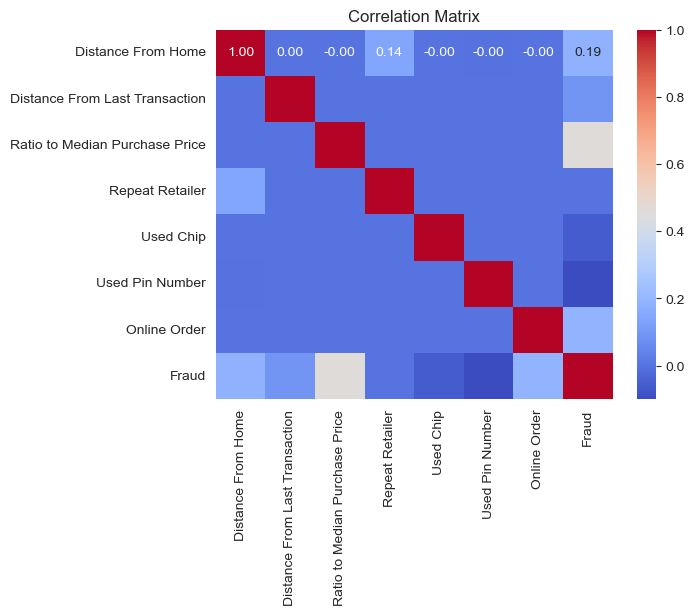

In [113]:
corr_matrix = df.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [114]:
test = df[['Repeat Retailer', 'Online Order']]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   Repeat Retailer  1000000 non-null  int64
 1   Online Order     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [115]:
df[['Repeat Retailer','Fraud']].corr()

,Repeat Retailer,Fraud
Repeat Retailer,1.000000,-0.001357
Fraud,-0.001357,1.000000


In [116]:
df[['Online Order','Fraud']].corr()

,Online Order,Fraud
Online Order,1.000000,0.191973
Fraud,0.191973,1.000000


In [117]:
# What has the most fraud count Repeated Retailer vs Online Order

In [118]:
fraud_counts = df['Fraud'].value_counts()
fraud_ratio = fraud_counts[1] / fraud_counts[0] * 100

print("Number of fraudulent transactions (FRAUD = 1):", fraud_counts[1])
print("Number of non-fraudulent transactions (FRAUD = 0):", fraud_counts[0])
print("\nPercentage of fraudulent transactions: {:.2f}%".format(fraud_ratio))



Number of fraudulent transactions (FRAUD = 1): 87403
Number of non-fraudulent transactions (FRAUD = 0): 912597

Percentage of fraudulent transactions: 9.58%


In [ ]:
# Fradulant and Non fradulant Count
